In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

plt.close('all')

In [50]:
genre = 'electro'

# load in data
df = pd.read_pickle('data/topartists_'+genre)
df2 = pd.read_pickle('data/latlon_'+genre)

# fill empty data entries
df2.replace('', np.nan,inplace=True)
df2.dropna(subset=['city'],inplace=True)

In [51]:
# merge dataframes obrained from lastfm.py and musicbrainz.py to match playcounts with artists/origins
df2 = df2.join(df['playcount'])

# grab relevant columns for easy plotting
city = df2['city']
country = df2['country']

# now group the playcounts by country and order by ascending playcounts
df3 = df2.groupby('country').sum()
df4 = df3.sort(columns='playcount',ascending=False)

# add counter column to df4 for rank
df4['rank'] = np.arange(len(df4))+1
df4

,playcount,rank
country,,
FR,121261045,1
SE,100419712,2
CA,55990771,3
US,54571348,4
NL,51147202,5
DE,34539008,6
GB,31400245,7
CH,10893016,8
BE,8990082,9


In [52]:
####################################
# PLOTTING ROUTINES
####################################

# here I am plotting a barcharts showing the amount of artists per country 
plt.close('all')
df2['country'].value_counts()[0:20].plot(kind='bar')
plt.title('Top '+genre+' artists per country')
plt.ylabel('count')
# plt.savefig('output/'+genre+'_number_of_top_artists.pdf', dpi=150, bbox_inches='tight', pad_inches=0.2)\

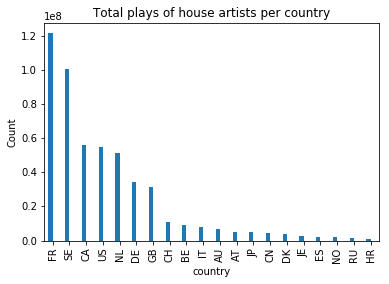

In [53]:
# same plot but the total amount of plays per country
plt.close('all')
df4[0:20].plot(kind='bar',legend=False)
plt.title('Total plays of '+genre+' artists per country')
plt.ylabel('Count')
plt.show()
# plt.savefig('output/'+genre+'_playcounts_per_country.pdf', dpi=150, bbox_inches='tight', pad_inches=0.2)

In [54]:
# now update the JSON data with playcounts per country for leaflet plotting
# read in original JSON
filename = '../origin/data/world.json'
with open(filename, 'r') as f:
    data = json.load(f)

# add in new colums for playcount and normalized playount (for color coding)
for i in range(len(data['features'])):
    data['features'][i]['properties']['playcount'] = 'zero'
    data['features'][i]['properties']['norm_playcount'] = 'zero'
    data['features'][i]['properties']['rank'] = 'zero'
   
    # match ISO 3166-1 alpha-2 codes in my Pandas dataframe with that in the JSON file and populate the playcount and norm_playcount fields
    if any(data['features'][i]['properties']['ISO2'] == df4.index):
        index = np.argmax(data['features'][i]['properties']['ISO2'] == df4.index)

        data['features'][i]['properties']['playcount'] = np.str_(df4['playcount'][index])
        data['features'][i]['properties']['norm_playcount'] = np.str_(np.float_(df4['playcount'][index])/df4['playcount'].max())
        data['features'][i]['properties']['rank'] = np.str_(df4['rank'][index])

# write out JSON values with playcount columns, ready to be rocked in the leaflet map
with open('../origin/data/world_playcount_'+genre+'.json', 'w') as f:
    json.dump(data, f, indent=4)